# Univariate linear regression implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Random data
points_size = 100
theta_0_random = 2
theta_1_random = 3

# Train data
iterations = 100
theta_0 = 0
theta_1 = 0

------------------ Data  ------------------

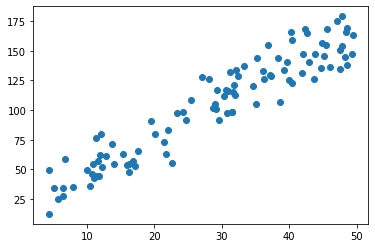

In [3]:
# x = random
x = np.random.uniform(0, 50, points_size) 

# y = b + a*x

# b = random + noise
b = (theta_0_random + np.random.normal(0, 10, points_size))

# ax = random * x + noise
ax = (theta_1_random * (x + np.random.uniform(0, 10, points_size)))

y = b + ax

plt.scatter(x, y)
plt.show()

------------------ Hypothesis ------------------

In [4]:
def linear_hypothesis(theta_0, theta_1):
    def h(x):
        y = theta_0 + theta_1*x
        return y
    return h

------------------ cost function ------------------

In [5]:
def cost_function(hypothesis, x, y):
    def j(theta_0, theta_1):
        hypothesis = linear_hypothesis(theta_0, theta_1)
        cost = 1/(2*len(x))*((hypothesis(x) - y)**2).sum()
        return cost
    return j

------------------ Plotting ------------------

Text(0.5, 1.0, 'Cost function')

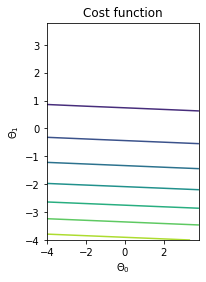

In [6]:
ran = 4.
a = theta_0
b = theta_1

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0),len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)
T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Cost function')

------------------ Update weights ------------------

In [7]:
def compute_new_theta (x,y,theta_0,theta_1,alpha):

    temp0 = 1/len(x) * (theta_0 + theta_1 * x - y).sum()
    temp1 = 1/len(x) * ((theta_0 + theta_1 * x - y) * x).sum()

    theta_0 -= alpha*  temp0
    theta_1 -= alpha*  temp1

    return theta_0, theta_1

------------------ Gradient descent and plotting ------------------

In [8]:
def gradient_descent(theta_0, theta_1, lernrate, color):
    costs = np.array([])
    for i in range (iterations):
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, lernrate)
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j = cost_function(hypothesis, x, y)
        j_value = j(theta_0, theta_1)
        costs = np.append(costs, j_value, None)
        plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")   
    return np.array([costs, hypothesis, x, y])

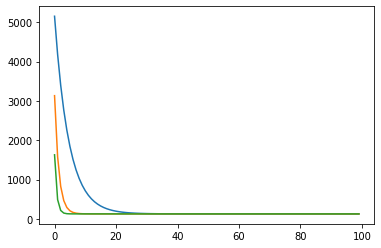

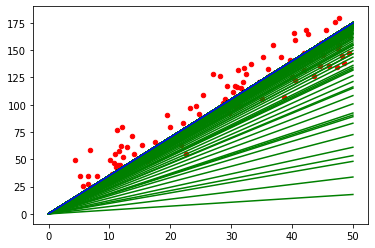

In [9]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax2 = f2.add_subplot(111)

gradient_1 = gradient_descent(theta_0, theta_1, 0.0001, "r")
ax1.plot(gradient_1[0])
ax2.plot([0,50],[gradient_1[1](0),gradient_1[1](50)], color="r")

gradient_2 = gradient_descent(theta_0, theta_1, 0.0003, "g")
ax1.plot(gradient_2[0])
ax2.plot([0,50],[gradient_2[1](0),gradient_2[1](50)], color="g")

gradient_3 = gradient_descent(theta_0, theta_1, 0.0005, "b")
ax1.plot(gradient_3[0])
ax2.plot([0,50],[gradient_3[1](0),gradient_3[1](50)], color="b")

ax2.scatter(gradient_1[2], gradient_1[3], color='r', s=20)

In [10]:
def gradient_descent_with_no_given_number_of_iteration(theta_0, theta_1):
    j = cost_function(linear_hypothesis(theta_0,theta_1), x, y)
    counter = 1
    j_old = j(theta_0, theta_1)
    while True:
        counter += 1
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, 0.0001)
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j_new = j(theta_0, theta_1)
        plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")
        if (j_old - j_new < 0.1 or counter > 2000):
            break
        j_old = j_new    
    plt.scatter(x, y, color='b', s=20)
    plt.show()

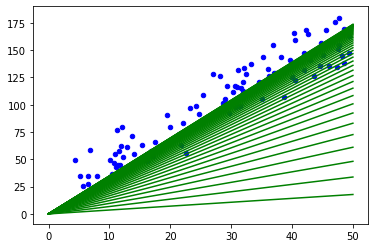

In [11]:
theta_0 = 0
theta_1 = 0
gradient_descent_with_no_given_number_of_iteration(theta_0, theta_1)